In [14]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import json
import os

Example entry at a single timestep in the JSON file:

```json
{
  "time": 0.24000000000000007,
  "ee_goal": {
    "x": 0.4,
    "y": -0.75,
    "z": 1.7,
    "roll": 1.518399507018242,
    "pitch": 0.04763160826963666,
    "yaw": 0.737151606155949
  },
  "ee_curr": {
    "x": 0.3226876335743811,
    "y": -0.8667752758924585,
    "z": 1.8885004527912521,
    "roll": 1.9446740867211925,
    "pitch": -0.20834913145559708,
    "yaw": 0.6099857313284582
  },
  "theta_diff": 0.5033419743923844,
  "joint_names": [
    "arm_left_joint1",
    "arm_left_joint2",
    "arm_left_joint3",
    "arm_left_joint4",
    "arm_left_joint5",
    "arm_left_joint6",
    "arm_left_joint7",
    "arm_right_joint1",
    "arm_right_joint2",
    "arm_right_joint3",
    "arm_right_joint4",
    "arm_right_joint5",
    "arm_right_joint6",
    "arm_right_joint7",
    "head_joint1",
    "head_joint2",
    "head_joint3",
    "head_joint4",
    "head_joint5",
    "head_joint6"
  ],
  "joint_positions": [
    -0.0018774319197194817,
    0.0029665779460760397,
    -0.0030017556572236193,
    0.0026050404422611377,
    -0.0017078547959206462,
    -0.004935864105950447,
    0.0003702023077872248,
    0.001695530118309552,
    -0.0005598927900961688,
    0.0037947316263039,
    0.002949965299059122,
    -0.002624134055153545,
    0.001230583004372089,
    0.001353472414172087,
    -0.8481321764990782,
    -0.5672127622365826,
    0.6664251314257632,
    -0.11913720604468482,
    -0.46930429225749815,
    -0.6265403244304898
  ],
  "joint_velocities": [
    0.010221430617089966,
    0.008428131994154129,
    -0.002891116043808841,
    -0.012084601529068961,
    0.008220101548604785,
    0.0005115687351937386,
    0.017113185699888137,
    0.003133834454006,
    -0.003630062079711901,
    0.006455848937763608,
    0.010486735248509425,
    -0.01615966168378254,
    -0.004612113877604457,
    0.0046080188418628045,
    -2.978082760029141,
    -1.5119787082486724,
    1.6379045755008375,
    -0.04106015565376411,
    -1.4273944218676222,
    -2.1839995416317652
  ],
  "joint_efforts": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
  ],
  "collision_state": false,
  "collision_distance": 0.0
}
```

In [15]:
ROBOT_NAME = "lite6"
IKSOLVER_NAME = "collision_ik"
PATH_NAME  = "-eight_yz"

In [16]:
collisionik_experiments = {}
for i in [1,2,3,4,5]:
  for experiment_file in glob.glob(ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json"):
      print("Loading file:", experiment_file)
      clean_filename = os.path.splitext(os.path.basename(experiment_file))[0]
      args_from_filename = clean_filename.split("-")

      entry = {}
      entry["waypoints"] = args_from_filename[0]
      entry["solver"] = args_from_filename[1]

      with open(experiment_file, "r") as f:
        entry["data"] = json.load(f)

      collisionik_experiments[clean_filename + str(i)] = entry

Loading file: lite6/1/collision_ik-eight_yz-.json
Loading file: lite6/2/collision_ik-eight_yz-.json
Loading file: lite6/3/collision_ik-eight_yz-.json
Loading file: lite6/4/collision_ik-eight_yz-.json
Loading file: lite6/5/collision_ik-eight_yz-.json


In [17]:
ROBOT_NAME = "lite6"
IKSOLVER_NAME = "dawn_ik"
dawnik_experiments = {}
for i in [1,2,3,4,5]:
  print("Filepath: ", ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json")
  for experiment_file in glob.glob(ROBOT_NAME+ "/" +  str(i) + "/" + IKSOLVER_NAME + PATH_NAME + "*.json"):
      print("Loading file:", experiment_file)
      clean_filename = os.path.splitext(os.path.basename(experiment_file))[0]
      args_from_filename = clean_filename.split("-")

      entry = {}
      entry["waypoints"] = args_from_filename[0]
      entry["solver"] = args_from_filename[1]

      with open(experiment_file, "r") as f:
        entry["data"] = json.load(f)
      #print("Entry name: ", clean_filename + "-" + str(i))
      dawnik_experiments[clean_filename + str(i)] = entry

Filepath:  lite6/1/dawn_ik-eight_yz*.json
Loading file: lite6/1/dawn_ik-eight_yz-.json
Filepath:  lite6/2/dawn_ik-eight_yz*.json
Loading file: lite6/2/dawn_ik-eight_yz-.json
Filepath:  lite6/3/dawn_ik-eight_yz*.json
Loading file: lite6/3/dawn_ik-eight_yz-.json
Filepath:  lite6/4/dawn_ik-eight_yz*.json
Loading file: lite6/4/dawn_ik-eight_yz-.json
Filepath:  lite6/5/dawn_ik-eight_yz*.json
Loading file: lite6/5/dawn_ik-eight_yz-.json


In [18]:
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

#y, error = tolerant_mean(list_of_ys_diff_len)
#ax.plot(np.arange(len(y))+1, y, color='green')

In [19]:
IKSOLVER_NAME = "dawn_ik"

dawn_joint_positions = []
dawn_joint_velocities = []


dawn_list_pos_x = []
dawn_list_pos_y = []
dawn_list_pos_z = []


dawn_list_pos_x_goal = []
dawn_list_pos_y_goal = []
dawn_list_pos_z_goal = []

dawn_list_err_x = []
dawn_list_err_y = []
dawn_list_err_z = []


dawn_time = []
dawn_list_time = []
dawn_joint_names = None
for i  in [1,2,3,4,5]:
    experiment_file_name = IKSOLVER_NAME  + PATH_NAME + "-" + str(i)
    dawn_pos_x = []
    dawn_pos_y = []
    dawn_pos_z = []

    dawn_pos_x_goal = []
    dawn_pos_y_goal = []
    dawn_pos_z_goal = []
    dawn_time = []
    for d in dawnik_experiments[experiment_file_name]["data"]:
        dawn_joint_positions.append(d["joint_positions"])
        dawn_joint_positions.append(d["joint_velocities"])
        dawn_pos_x.append(d["ee_curr"]["x"])
        dawn_pos_y.append(d["ee_curr"]["y"])
        dawn_pos_z.append(d["ee_curr"]["z"])

        dawn_pos_x_goal.append(d["ee_goal"]["x"])
        dawn_pos_y_goal.append(d["ee_goal"]["y"])
        dawn_pos_z_goal.append(d["ee_goal"]["z"])    
        dawn_time.append(d["time"])
        dawn_joint_names = d["joint_names"]

    dawn_pos_x = np.array(dawn_pos_x)
    dawn_pos_y = np.array(dawn_pos_y)
    dawn_pos_z = np.array(dawn_pos_z)

    dawn_pos_x_goal = np.array(dawn_pos_x_goal)
    dawn_pos_y_goal = np.array(dawn_pos_y_goal)
    dawn_pos_z_goal = np.array(dawn_pos_z_goal)

    dawn_err_x = dawn_pos_x_goal - dawn_pos_x
    dawn_err_y = dawn_pos_y_goal - dawn_pos_y
    dawn_err_z = dawn_pos_z_goal - dawn_pos_z
    dawn_list_err_x.append(dawn_err_x)
    dawn_list_err_y.append(dawn_err_y)
    dawn_list_err_z.append(dawn_err_z)


    dawn_time = np.array(dawn_time)

    dawn_list_pos_x.append(dawn_pos_x)
    dawn_list_pos_y.append(dawn_pos_y)
    dawn_list_pos_z.append(dawn_pos_z)

    dawn_list_pos_x_goal.append(dawn_pos_x_goal)
    dawn_list_pos_y_goal.append(dawn_pos_y_goal)
    dawn_list_pos_z_goal.append(dawn_pos_z_goal)
    dawn_list_time.append(dawn_time)

dawn_joint_positions = np.array(dawn_joint_positions)
dawn_joint_velocities = np.array(dawn_joint_velocities)
print("shape:", dawn_joint_positions.shape)

# plt.subplots(figsize=(10,10))
# plt.title("Joint Positions")
# plt.xlabel("Time [sec]")
# plt.ylabel("Angle [rad]")
# plt.plot(time, joint_positions, label=joint_names)
# plt.legend()
# plt.show()

# plt.subplots(figsize=(10,10))
# plt.title("Joint Velocities")
# plt.xlabel("Time [sec]")
# plt.ylabel("Velocity [rad/s]")
# plt.plot(time, joint_velocities, label=joint_names)
# plt.legend()
# plt.show()

dawn_err_x_mean, dawn_error_xe = tolerant_mean(dawn_list_err_x)
dawn_err_y_mean, dawn_error_ye = tolerant_mean(dawn_list_err_y)
dawn_err_z_mean, dawn_error_ze = tolerant_mean(dawn_list_err_z)

dawn_x_mean, dawn_error_x = tolerant_mean(dawn_list_pos_x)
dawn_y_mean, dawn_error_y = tolerant_mean(dawn_list_pos_y)
dawn_z_mean, dawn_error_z = tolerant_mean(dawn_list_pos_z)

dawn_xg_mean, dawn_error_xg = tolerant_mean(dawn_list_pos_x_goal)
dawn_yg_mean, dawn_error_yg = tolerant_mean(dawn_list_pos_y_goal)
dawn_zg_mean, dawn_error_zg = tolerant_mean(dawn_list_pos_z_goal)

dawn_t, error_t = tolerant_mean(dawn_list_time)

shape: (51000, 6)


In [20]:
IKSOLVER_NAME = "collision_ik"
coll_joint_positions = []
coll_joint_velocities = []


coll_list_pos_x = []
coll_list_pos_y = []
coll_list_pos_z = []


coll_list_pos_x_goal = []
coll_list_pos_y_goal = []
coll_list_pos_z_goal = []

coll_list_err_x = []
coll_list_err_y = []
coll_list_err_z = []


coll_time = []
coll_list_time = []
coll_joint_names = None
for i  in [1,2,3,4,5]:
    experiment_file_name = IKSOLVER_NAME  + PATH_NAME  + "-" + str(i)
    coll_pos_x = []
    coll_pos_y = []
    coll_pos_z = []

    coll_pos_x_goal = []
    coll_pos_y_goal = []
    coll_pos_z_goal = []
    coll_time = []
    for d in collisionik_experiments[experiment_file_name]["data"]:
        coll_joint_positions.append(d["joint_positions"])
        coll_joint_positions.append(d["joint_velocities"])
        coll_pos_x.append(d["ee_curr"]["x"])
        coll_pos_y.append(d["ee_curr"]["y"])
        coll_pos_z.append(d["ee_curr"]["z"])

        coll_pos_x_goal.append(d["ee_goal"]["x"])
        coll_pos_y_goal.append(d["ee_goal"]["y"])
        coll_pos_z_goal.append(d["ee_goal"]["z"])    
        coll_time.append(d["time"])
        coll_joint_names = d["joint_names"]

    coll_pos_x = np.array(coll_pos_x)
    coll_pos_y = np.array(coll_pos_y)
    coll_pos_z = np.array(coll_pos_z)

    coll_pos_x_goal = np.array(coll_pos_x_goal)
    coll_pos_y_goal = np.array(coll_pos_y_goal)
    coll_pos_z_goal = np.array(coll_pos_z_goal)

    coll_err_x = coll_pos_x_goal - coll_pos_x
    coll_err_y = coll_pos_y_goal - coll_pos_y
    coll_err_z = coll_pos_z_goal - coll_pos_z
    coll_list_err_x.append(coll_err_x)
    coll_list_err_y.append(coll_err_y)
    coll_list_err_z.append(coll_err_z)


    coll_time = np.array(coll_time)

    coll_list_pos_x.append(coll_pos_x)
    coll_list_pos_y.append(coll_pos_y)
    coll_list_pos_z.append(coll_pos_z)

    coll_list_pos_x_goal.append(coll_pos_x_goal)
    coll_list_pos_y_goal.append(coll_pos_y_goal)
    coll_list_pos_z_goal.append(coll_pos_z_goal)
    coll_list_time.append(coll_time)

joint_positions = np.array(coll_joint_positions)
joint_velocities = np.array(coll_joint_velocities)
print("shape:", joint_positions.shape)

# plt.subplots(figsize=(10,10))
# plt.title("Joint Positions")
# plt.xlabel("Time [sec]")
# plt.ylabel("Angle [rad]")
# plt.plot(time, joint_positions, label=joint_names)
# plt.legend()
# plt.show()

# plt.subplots(figsize=(10,10))
# plt.title("Joint Velocities")
# plt.xlabel("Time [sec]")
# plt.ylabel("Velocity [rad/s]")
# plt.plot(time, joint_velocities, label=joint_names)
# plt.legend()
# plt.show()

coll_err_x_mean, coll_error_xe = tolerant_mean(coll_list_err_x)
coll_err_y_mean, coll_error_ye = tolerant_mean(coll_list_err_y)
coll_err_z_mean, coll_error_ze = tolerant_mean(coll_list_err_z)

coll_x_mean, coll_error_x = tolerant_mean(coll_list_pos_x)
coll_y_mean, coll_error_y = tolerant_mean(coll_list_pos_y)
coll_z_mean, coll_error_z = tolerant_mean(coll_list_pos_z)

coll_xg_mean, coll_error_xg = tolerant_mean(coll_list_pos_x_goal)
coll_yg_mean, coll_error_yg = tolerant_mean(coll_list_pos_y_goal)
coll_zg_mean, coll_error_zg = tolerant_mean(coll_list_pos_z_goal)

coll_t, error_t = tolerant_mean(coll_list_time)

shape: (51000, 6)


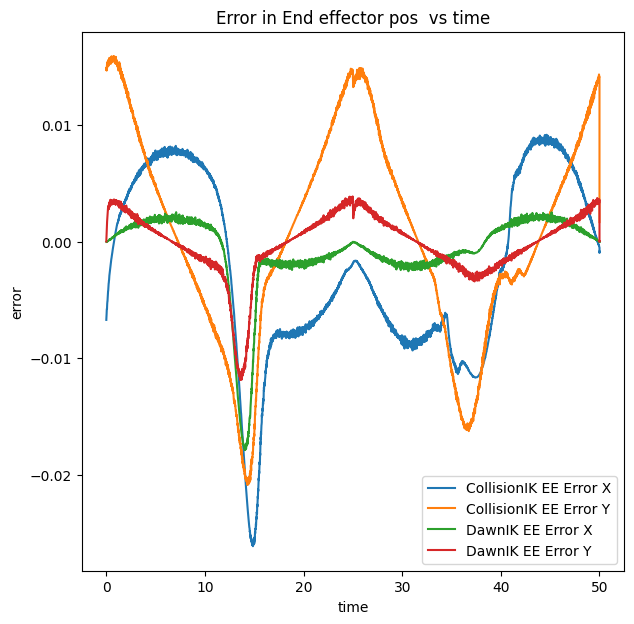

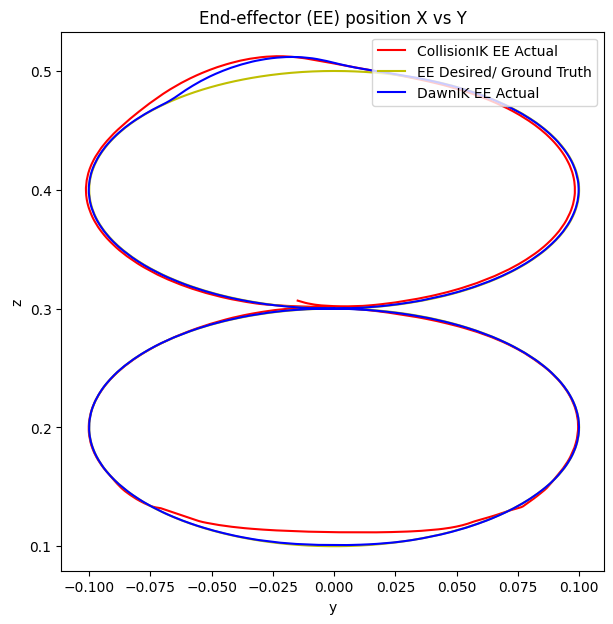

In [22]:

plt.subplots(figsize=(7,7))
plt.title("Error in End effector pos  vs time")
plt.xlabel("time")
plt.ylabel("error")
plt.plot(coll_t, coll_err_z_mean, label="CollisionIK EE Error X")
plt.plot(coll_t, coll_err_y_mean, label="CollisionIK EE Error Y")
plt.plot(dawn_t, dawn_err_z_mean, label="DawnIK EE Error X")
plt.plot(dawn_t, dawn_err_y_mean, label="DawnIK EE Error Y")
plt.legend()
plt.show()



plt.subplots(figsize=(7,7))
plt.title("End-effector (EE) position X vs Y")
plt.xlabel("y")
plt.ylabel("z")
plt.plot(coll_y_mean, coll_z_mean, label="CollisionIK EE Actual", color="r")
plt.plot(coll_yg_mean, coll_zg_mean, label="EE Desired/ Ground Truth",  color="y")
#plt.plot(coll_err_z_mean, coll_err_y_mean, label="CollisionIK EE error")
plt.plot(dawn_y_mean, dawn_z_mean, label="DawnIK EE Actual",  color="b")
#plt.plot(dawn_err_z_mean, dawn_err_y_mean, label="DawnIK EE error")


plt.legend(loc="upper right")

plt.show()

In [ ]:
IKSOLVER_NAME = "collision_ik"
num_collisions = 0
for i  in [1,2,3,4,5]:
    experiment_file_name = IKSOLVER_NAME + PATH_NAME + "-" + str(i)
    for d in collisionik_experiments[experiment_file_name]["data"]:
        num_collisions += int(d["collision_state"])
print("Total collision states:", num_collisions)

Total collision states: 0


In [ ]:
IKSOLVER_NAME = "dawn_ik"
num_collisions = 0
for i  in [1,2,3,4,5]:
    experiment_file_name = IKSOLVER_NAME + PATH_NAME + "-" + str(i)
    for d in dawnik_experiments[experiment_file_name]["data"]:
        num_collisions += int(d["collision_state"])
print("Total collision states:", num_collisions)

Total collision states: 0


In [ ]:
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 
TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO TODO 

for m_type in samples_t.keys():
    fig, ax = plt.subplots(1, figsize=(7,5))
    for i, e_type in enumerate( sorted(samples_t[m_type].keys()) ):
        s = samples_t[m_type][e_type]
        timestamp, test_tra, test_rot, gt_tra, gt_rot = separate_data(s["data"])
        traj_err = np.linalg.norm(test_tra - gt_tra, axis=1)
        ax.plot(timestamp, traj_err, label=e_type)
    ax.set_ylabel("Endpoint translation error")
    ax.set_xlabel("Time [seconds]")
    ax.grid()
    ax.legend()
    fig.suptitle(m_type)
    fig.tight_layout()
    plt.plot()

SyntaxError: invalid syntax (3937367627.py, line 1)